<a href="https://colab.research.google.com/github/Marlrero/AI_PrimaryEducation/blob/main/azml_taejun_minwoo_DNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras DNN으로 집 값 예측하기 - 과제

* Reference (모든 과제)
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
  - https://scikit-learn.org/stable/modules/cross_validation.html
  - https://davinci-ai.tistory.com/18
  - https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
  - https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


#### 기본 예제

훈련 데이터셋 차원: (506, 12)
레이블 차원: (506,)
Training set shape: (354, 12)
Training label shape: (354,)
Test set shape: (152, 12)
Test label shape: (152,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________
총 학습 시간: 6.9sec
Mean Squared Error: 0.16


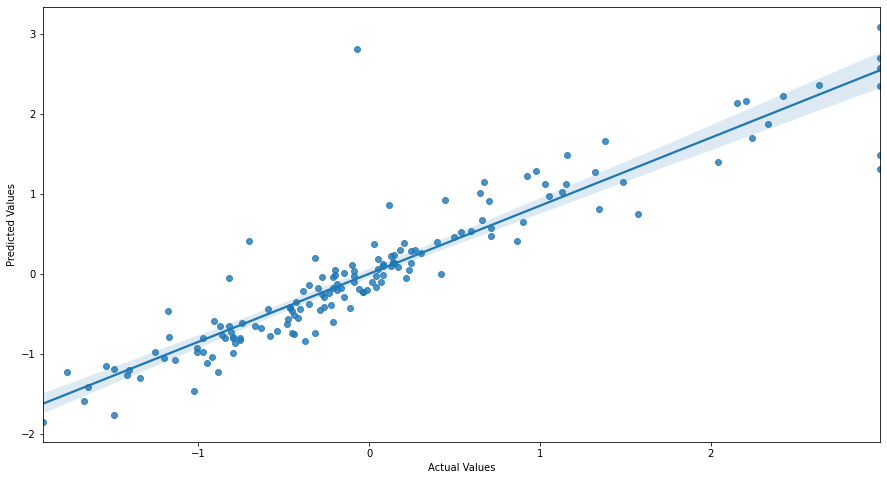

In [1]:
import pandas as pd  # 수학 패키지
import matplotlib.pyplot as plt # 그래프 패키지
import seaborn as sns # 그래프 패키지
from time import time # 시간 패키지

from keras.models import Sequential                  # 일렬로 쌓아서 구성하는 간단한 계층
from keras.layers import Dense                       # 완전 연결 계층
from sklearn.preprocessing import StandardScaler     # 데이터를 표준화함 (전처리)
from sklearn.model_selection import train_test_split # 훈련집합과 검증집합 분리

pd.set_option('display.max_columns', None)   # Pandas 출력에서 컬럼을 skip하지 않고 모두 출력

MY_HIDDEN = 1000  # Hidden Node 갯수
MY_EPOCH = 500    # epoch: 반복 횟수 (길면 정확도가 크고, 시간이 오래걸림)
MY_BATCH = 64     # Batch size: 신경망은 미니배치(샘플을 자른 것) 단위로 학습함

# CSV 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')

# z-점수 정규화
scaler = StandardScaler()
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

# 데이터를 입력과 출력으로 분리
X_data = Z_data.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV 제외해야 함)
Y_data = Z_data['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV

print("훈련 데이터셋 차원:", X_data.shape)
print("레이블 차원:", Y_data.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test label shape:", Y_test.shape)

model = Sequential()
input = X_train.shape[1] # 12개 입력 노드
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))
model.summary() 

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))

pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### 1

훈련 데이터셋 차원: (506, 12)
레이블 차원: (506,)
Training set shape: (354, 12)
Training label shape: (354,)
Test set shape: (152, 12)
Test label shape: (152,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________
총 학습 시간: 5.1sec
Mean Squared Error: 0.19


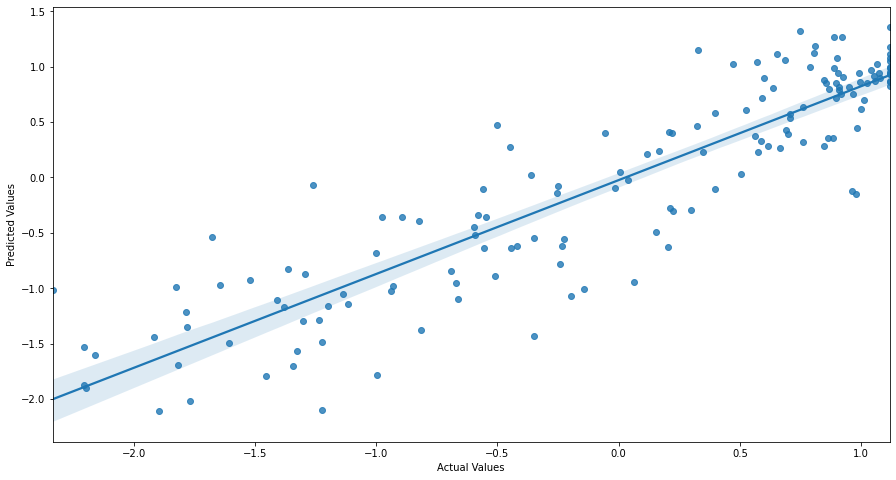

In [2]:
import pandas as pd  # 수학 패키지
import matplotlib.pyplot as plt # 그래프 패키지
import seaborn as sns # 그래프 패키지
from time import time # 시간 패키지

from keras.models import Sequential                  # 일렬로 쌓아서 구성하는 간단한 계층
from keras.layers import Dense                       # 완전 연결 계층
from sklearn.preprocessing import StandardScaler     # 데이터를 표준화함 (전처리)
from sklearn.model_selection import train_test_split # 훈련집합과 검증집합 분리

pd.set_option('display.max_columns', None)   # Pandas 출력에서 컬럼을 skip하지 않고 모두 출력

MY_HIDDEN = 1000  # Hidden Node 갯수
MY_EPOCH = 500    # epoch: 반복 횟수 (길면 정확도가 크고, 시간이 오래걸림)
MY_BATCH = 64     # Batch size: 신경망은 미니배치(샘플을 자른 것) 단위로 학습함

# CSV 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')

# z-점수 정규화
scaler = StandardScaler()
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

# 데이터를 입력과 출력으로 분리
X_data = Z_data.drop('AGE', axis=1) # 훈련 데이터셋 (AGE를 제외해야 함)
Y_data = Z_data['AGE'] # 학습하여 맞춰야 하는 레이블 AGE

print("훈련 데이터셋 차원:", X_data.shape)
print("레이블 차원:", Y_data.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test label shape:", Y_test.shape)

model = Sequential()
input = X_train.shape[1] # 12개 입력 노드
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))
model.summary() 

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))

pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

AGE가 더 쉬울 것으로 예상됨. 오차도 더 낮음.

#### 2

In [3]:
# 추가 모듈
import numpy as np
from keras.losses import MSE

###############################3
import pandas as pd  # 수학 패키지
import matplotlib.pyplot as plt # 그래프 패키지
import seaborn as sns # 그래프 패키지
from time import time # 시간 패키지

from keras.models import Sequential                  # 일렬로 쌓아서 구성하는 간단한 계층
from keras.layers import Dense                       # 완전 연결 계층
from sklearn.preprocessing import StandardScaler     # 데이터를 표준화함 (전처리)
from sklearn.model_selection import train_test_split # 훈련집합과 검증집합 분리

pd.set_option('display.max_columns', None)   # Pandas 출력에서 컬럼을 skip하지 않고 모두 출력

MY_HIDDEN = 1000  # Hidden Node 갯수
MY_EPOCH = 500    # epoch: 반복 횟수 (길면 정확도가 크고, 시간이 오래걸림)
MY_BATCH = 64     # Batch size: 신경망은 미니배치(샘플을 자른 것) 단위로 학습함

# CSV 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')

# z-점수 정규화
scaler = StandardScaler()
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

# 데이터를 입력과 출력으로 분리
X_data = Z_data.drop('AGE', axis=1) # 훈련 데이터셋 (AGE를 제외해야 함)
Y_data = Z_data['AGE'] # 학습하여 맞춰야 하는 레이블 AGE

print("훈련 데이터셋 차원:", X_data.shape)
print("레이블 차원:", Y_data.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test label shape:", Y_test.shape)

model = Sequential()
input = X_train.shape[1] # 12개 입력 노드
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))
model.summary() 

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))

# X_test를 넘파이로 바꾼 후, 2차원으로 늘려서 predict
X_test_np = np.array(X_test)
X_test_3 = np.expand_dims(X_test_np[3], 0)
pred = model.predict(x=X_test_3)
print("Predict:", pred)

# Y_test를 넘파이로 바꾼 후 정답 출력
Y_test_np = np.array(Y_test)
truth = Y_test_np[3]
print("Truth:", truth)

# kreas.loss의 MSE 사용
print("Loss:", MSE(truth, pred))

# Scatter plot 출력
# plt.figure(figsize=(15, 8)) # figure size
# sns.regplot(x=Y_test, y=pred) # 정답, 추측값
#plt.xlabel("Actual Values")
#plt.ylabel("Predicted Values")
#plt.show()

훈련 데이터셋 차원: (506, 12)
레이블 차원: (506,)
Training set shape: (354, 12)
Training label shape: (354,)
Test set shape: (152, 12)
Test label shape: (152,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________
총 학습 시간: 5.2sec
Mean Squared Error: 0.22
Predict: [[0.03073285]]
Truth: -0.12001341619804987
Loss: tf.Tensor([0.02272443], shape=(1,), dtype=float32)


#### 3

In [5]:
# 추가
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
####################################

import pandas as pd  # 수학 패키지
import matplotlib.pyplot as plt # 그래프 패키지
import seaborn as sns # 그래프 패키지
from time import time # 시간 패키지

from keras.models import Sequential                  # 일렬로 쌓아서 구성하는 간단한 계층
from keras.layers import Dense                       # 완전 연결 계층
from sklearn.preprocessing import StandardScaler     # 데이터를 표준화함 (전처리)
from sklearn.model_selection import train_test_split # 훈련집합과 검증집합 분리

pd.set_option('display.max_columns', None)   # Pandas 출력에서 컬럼을 skip하지 않고 모두 출력

MY_HIDDEN = 1000  # Hidden Node 갯수
MY_EPOCH = 500    # epoch: 반복 횟수 (길면 정확도가 크고, 시간이 오래걸림)
MY_BATCH = 64     # Batch size: 신경망은 미니배치(샘플을 자른 것) 단위로 학습함

# CSV 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')

# z-점수 정규화
scaler = StandardScaler()
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

# 데이터를 입력과 출력으로 분리
X_data = Z_data.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV 제외해야 함)
Y_data = Z_data['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV

print("훈련 데이터셋 차원:", X_data.shape)
print("레이블 차원:", Y_data.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
#print("Training set shape:", X_train.shape)
#print("Training label shape:", Y_train.shape)
#print("Test set shape:", X_test.shape)
#print("Test label shape:", Y_test.shape)

##### 추가 코드
def create_model(optimizer='sgd', loss='mse'):
    model = Sequential()
    input = X_train.shape[1] # 12개 입력 노드
    model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
    model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
    model.add(Dense(name='OutputLayer', units=1))
    #model.summary()
    model.compile(optimizer=optimizer, loss=loss)
    return model


#model.compile(optimizer='sgd', loss='mse')

param_grid = [ 
        {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adam'], 'loss': ['mse', 'mae', 'mape']},
      ]

model = KerasRegressor(build_fn=create_model, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

################################
begin = time() # 학습시간 측정
grid_result = grid.fit(X=X_train, y=Y_train)
#model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

print(grid.best_score_, grid.best_params_)

#loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
#print("Mean Squared Error: {:.2f}".format(loss))

print("Test Score:", grid_result.score(X_test, Y_test))

#pred = model.predict(x=X_test)

# Scatter plot 출력
#plt.figure(figsize=(15, 8)) # figure size
#sns.regplot(x=Y_test, y=pred) # 정답, 추측값
#plt.xlabel("Actual Values")
#plt.ylabel("Predicted Values")
#plt.show()

훈련 데이터셋 차원: (506, 12)
레이블 차원: (506,)
총 학습 시간: 301.8sec
-0.13016537725925445 {'loss': 'mse', 'optimizer': 'Adam'}
Test Score: -0.10953659564256668


* (cv 기본 값이 5)
* Scikit-learn에서는 regression loss(error) metrics가 neg로 되어 있음 (Ref: https://scikit-learn.org/stable/modules/model_evaluation.html)

#### 4.

In [8]:
# 추가
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
####################################

import pandas as pd  # 수학 패키지
import matplotlib.pyplot as plt # 그래프 패키지
import seaborn as sns # 그래프 패키지
from time import time # 시간 패키지

from keras.models import Sequential                  # 일렬로 쌓아서 구성하는 간단한 계층
from keras.layers import Dense                       # 완전 연결 계층
from sklearn.preprocessing import StandardScaler     # 데이터를 표준화함 (전처리)
from sklearn.model_selection import train_test_split # 훈련집합과 검증집합 분리

pd.set_option('display.max_columns', None)   # Pandas 출력에서 컬럼을 skip하지 않고 모두 출력

MY_HIDDEN = 1000  # Hidden Node 갯수
MY_EPOCH = 500    # epoch: 반복 횟수 (길면 정확도가 크고, 시간이 오래걸림)
MY_BATCH = 64     # Batch size: 신경망은 미니배치(샘플을 자른 것) 단위로 학습함

# CSV 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')
0
# z-점수 정규화
scaler = StandardScaler()
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

# 데이터를 입력과 출력으로 분리
X_data = Z_data.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV 제외해야 함)
Y_data = Z_data['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV

print("훈련 데이터셋 차원:", X_data.shape)
print("레이블 차원:", Y_data.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
#print("Training set shape:", X_train.shape)
#print("Training label shape:", Y_train.shape)
#print("Test set shape:", X_test.shape)
#print("Test label shape:", Y_test.shape)


##### 추가 코드
def create_model(units=MY_HIDDEN, activation='relu'):
    model = Sequential()
    input = X_train.shape[1] # 12개 입력 노드
    model.add(Dense(name='HiddenLayer1', units=units, input_dim=input, activation=activation))
    model.add(Dense(name='HiddenLayer2', units=units, activation=activation))
    model.add(Dense(name='OutputLayer', units=1))
    #model.summary()
    model.compile(optimizer='adam', loss='mse') # 이전에 나온 결과 (Adam / MSE)
    return model


#model.compile(optimizer='adam', loss='mse')

param_grid = [ 
        {
            'batch_size': [16, 32, 64, 128, 256], 'epochs': [100, 250, 500, 750, 1000]
        },
      ]

model = KerasRegressor(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
################################

begin = time() # 학습시간 측정
grid_result = grid.fit(X=X_train, y=Y_train)
#model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

print(grid.best_score_, grid.best_params_)

print("Test Score:", grid_result.score(X_test, Y_test))
#loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
#print("Error: {:.2f}".format(loss))

훈련 데이터셋 차원: (506, 12)
레이블 차원: (506,)
총 학습 시간: 852.0sec
-0.17230267077684402 {'batch_size': 128, 'epochs': 100}
Test Score: -0.07971213757991791


앞의 셸에서 0.16이 나온 것이 .0.07로 더 좋아짐을 확인하였음. (동일한 loss 지표인 mse임)

* 제언
  - 은닉 뉴런 개수나 활성화 함수를 바꿔서 얻는 결과에 대해서도 구현해봐야 함.